In [1]:

%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir("/home/titos/Hermes/Refactored_AVL")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ICARUS.Vehicle.plane import Airplane
from ICARUS.Vehicle.wing_segment import Wing_Segment
from ICARUS.Vehicle.wing_segment import define_linear_chord
from ICARUS.Vehicle.wing_segment import define_linear_span
from ICARUS.Environment.definition import Environment
import avl.input as avlinp
import avl.polars as avlpol

/home/titos/miniconda3/envs/myp/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
os.getcwd()

'/home/titos/Hermes/Refactored_AVL'

In [5]:
mw = Wing_Segment(
    name="Main_Wing_1",
    airfoil="2412",
    origin=np.array([0., 0., 0.]),
    orientation=np.array([0., 0., 0.]),
    is_symmetric=True,
    sweep_offset=0.1,
    span=2.0,
    dih_angle=0.0,
    chord_fun=define_linear_chord,
    chord=np.array([0.4, 0.4]),
    span_fun=define_linear_span,
    # twist_fun: Callable[[float, int], FloatArray],
    N=30,
    M=10,
    mass=1.0,
)
el = Wing_Segment(
    name="Elevator",
    airfoil="0012",
    origin=np.array([1.25, 0, 0]),
    orientation=np.array([0.0, 0.0, 0.0]),
    is_symmetric=True,
    sweep_offset=0.0,
    span=1.0,
    dih_angle=0.0,
    chord_fun=define_linear_chord,
    chord=np.array([0.2, 0.2]),
    span_fun=define_linear_span,
    # twist_fun: Callable[[float, int], FloatArray],
    N=20,
    M=5,
    mass=1.0,
)
rud = Wing_Segment(
    name="Rudder",
    airfoil="0012",
    origin=np.array([1.3, 0, 0.2]),
    orientation=np.array([0, 0., 90.0]),
    is_symmetric=True,
    sweep_offset=0.0,
    span=1.0,
    dih_angle=0.0,
    chord_fun=define_linear_chord,
    chord=np.array([0.1, 0.1]),
    span_fun=define_linear_span,
    # twist_fun: Callable[[float, int], FloatArray],
    N=20,
    M=5,
    mass=1.0,
)
w_polar = np.array([[-1, 0.23, 1.375], [0.034, 0.0064, 0.04]])  # NACA 2412 at Re = 5e5
el_polar = np.array(
    [[-1.15, 0, 1.15], [0.038, 0.00768, 0.038]]
)  # NACA 0012 at Re = 3e5
rud_polar = el_polar

pl = Airplane("plane_100", [mw, el, rud])

In [6]:
Env = Environment("Default")

In [7]:
pms = [(1.9, [-0.1, 0, 0.2], "payload"), (0.9, [-0.1, 0, 0.2], "pa2")]
pl.add_point_masses(pms)

In [8]:
avlinp.avl_mass(pl,Env,1.)
avlinp.avl_geo(pl,1.0,1.0,w_polar,1.0,el_polar,1.0,rud_polar,"full")
avlinp.get_Inertias(pl)


OPA
FULL MODEL
ALL WINGS


array([ 0.5437,  2.624 ,  2.91  , -0.757 , -0.    , -0.    ])

In [23]:
angles = np.linspace(-10,10,11)
avlpol.case_def(pl, angles)
avlpol.case_setup(pl)
avlpol.case_run(pl,angles)
from avl.post import polar_postprocess
pol_df = polar_postprocess(pl,angles)


  Athena Vortex Lattice  Program      Version  3.40
  Copyright (C) 2002   Mark Drela, Harold Youngren

  This software comes with ABSOLUTELY NO WARRANTY,
    subject to the GNU General Public License.

  Caveat computor

   Quit    Exit program

  .OPER    Compute operating-point run cases
  .MODE    Eigenvalue analysis of run cases
  .TIME    Time-domain calculations

   LOAD f  Read configuration input file
   MASS f  Read mass distribution file
   CASE f  Read run case file

   CINI    Clear and initialize run cases
   MSET i  Apply mass file data to stored run case(s)

  .PLOP    Plotting options
   NAME s  Specify new configuration name

 AVL   c>  
 Reading file: plane_100_genD/plane_100.avl  ...

 Configuration: plane_100                                                   

   Building surface: Main Wing                               
 ** Polar data for surface (all sections)
    Reading CD(CL) data for surface
     CLneg    =   -1.000  CD@CLneg =    0.03400
     CL@CDmin =    

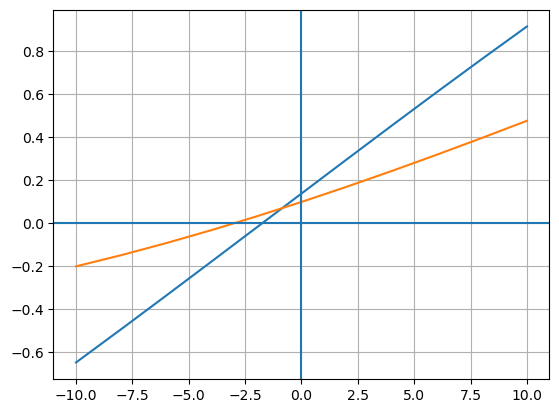

In [24]:
plt.plot(pol_df[0], pol_df[1])
plt.plot(pol_df[0], pol_df[3])
plt.axhline()
plt.axvline()

plt.grid(True)

In [ ]:
Env.GRAVITY

9.81